In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras import backend as K

class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = gamma

    def build(self, input_shape):
        # Create a trainable weight variable for the centers of the RBFs
        self.centers = self.add_weight(name='centers',
                                      shape=(self.units, input_shape[-1]),
                                      initializer='uniform',
                                      trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        # Calculate the radial basis functions for each input sample and each RBF center
        diff = K.expand_dims(inputs) - self.centers  # shape: (batch_size, units, input_dim)
        norm = K.sum(K.square(diff), axis=-1)  # shape: (batch_size, units)
        rbf = K.exp(-self.gamma * norm)  # shape: (batch_size, units)

        return rbf

    def compute_output_shape(self, input_shape):
        return input_shape[0], self.units

In [28]:
def training_modelacc(filename):
    # Memuat dataset
    df = pd.read_csv(filename, delimiter=',')
    # Menentukan input(X) dan output (y)
    X = df.drop(columns=["SHOT","GOAL","7MSHOT","6MSHOT","9MSHOT","WINGSHOT","PIVOTSHOT","FASTBREAKSHOT"])
    y = df.GOAL
    # Membagi dataset 80:20 untuk train dan test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # normalisasi dataset agar tidak bias
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    # membuat model neural network
    model = Sequential()
    model.add(Flatten(input_shape=(6,)))  # input layer dimana jumlah neuron sesuai dengan input
    model.add(RBFLayer(6, 0.5)) # hidden layer dimana rbf kernel dijalankan dengan neuron sebanyak input dan nilai gamma
    model.add(Dense(1, activation='linear'))  # aktivasi secara linear
    model.compile(optimizer='rmsprop', loss=mean_squared_error,metrics=['mean_absolute_error']) 
    
    history = model.fit(X_train, y_train, batch_size=8, epochs=100, validation_data=(X_test, y_test))

    plt.figure(figsize=(16, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training MSE')
    plt.plot(history.history['val_loss'], label='Validation MSE')
    plt.title('MSE')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.grid(True)
    plt.legend()
    
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mean_absolute_error'], label='Training MAE')
    plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
    plt.title('MAE')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.grid(True)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    r2_train = r2_train(y_train, pred_train)
    r2_test = r2_score(y_test, pred_test)
    print(f"R-Squared Train Score",r2_train)
    print(f"R-Squared Test Score",r2_test)
    return model
    # model.save(f'modelakurasi_{os.path.splitext(os.path.basename(filename))[0]}')

    
    return model
def training_modelshot(filename):
    # load data
    df = pd.read_csv(filename, delimiter=',')
    # input and output
    X = df.drop(columns=["SHOT","GOAL","7MACC","6MACC","9MACC","WINGACC","PIVOTACC","FASTBREAKACC"])
    y = df.GOAL
    # dataset splitting
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # dataset normalization
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    # create the model
    model = Sequential()
    model.add(Flatten(input_shape=(6,)))  # input layer dimana jumlah neuron sesuai dengan input
    model.add(RBFLayer(6, 0.5)) # hidden layer dimana rbf kernel dijalankan dengan neuron sebanyak input dan nilai gamma
    model.add(Dense(1, activation='linear'))  # aktivasi secara linear
    model.compile(optimizer='rmsprop', loss=mean_squared_error,metrics=['mean_absolute_error']) 
    
    history = model.fit(X_train, y_train, batch_size=8, epochs=100, validation_data=(X_test, y_test))

    plt.figure(figsize=(16, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training MSE')
    plt.plot(history.history['val_loss'], label='Validation MSE')
    plt.title('MSE')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.grid(True)
    plt.legend()
    
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mean_absolute_error'], label='Training MAE')
    plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
    plt.title('MAE')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.grid(True)
    plt.legend()

   

    plt.tight_layout()
    plt.show()
    
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    r2_train = r2_train(y_train, pred_train)
    r2_test = r2_score(y_test, pred_test)
    print(f"R-Squared Train Score",r2_train)
    print(f"R-Squared Test Score",r2_test)

    return model
    # model.save(f'modelakurasi_{os.path.splitext(os.path.basename(filename))[0]}')


Position:  CB.csv
Epoch 1/100
264/264 [==============================] - 1s 2ms/step - loss: 10.2218 - mean_absolute_error: 2.4320 - val_loss: 7.3825 - val_mean_absolute_error: 1.9836
Epoch 2/100
264/264 [==============================] - 0s 1ms/step - loss: 5.6108 - mean_absolute_error: 1.7848 - val_loss: 4.9100 - val_mean_absolute_error: 1.7116
Epoch 3/100
264/264 [==============================] - 0s 2ms/step - loss: 4.2738 - mean_absolute_error: 1.6337 - val_loss: 4.1721 - val_mean_absolute_error: 1.6100
Epoch 4/100
264/264 [==============================] - 0s 1ms/step - loss: 3.7123 - mean_absolute_error: 1.5438 - val_loss: 3.7550 - val_mean_absolute_error: 1.5466
Epoch 5/100
264/264 [==============================] - 0s 1ms/step - loss: 3.3843 - mean_absolute_error: 1.4789 - val_loss: 3.4467 - val_mean_absolute_error: 1.4654
Epoch 6/100
264/264 [==============================] - 0s 1ms/step - loss: 3.1114 - mean_absolute_error: 1.4101 - val_loss: 3.1809 - val_mean_absolute_error

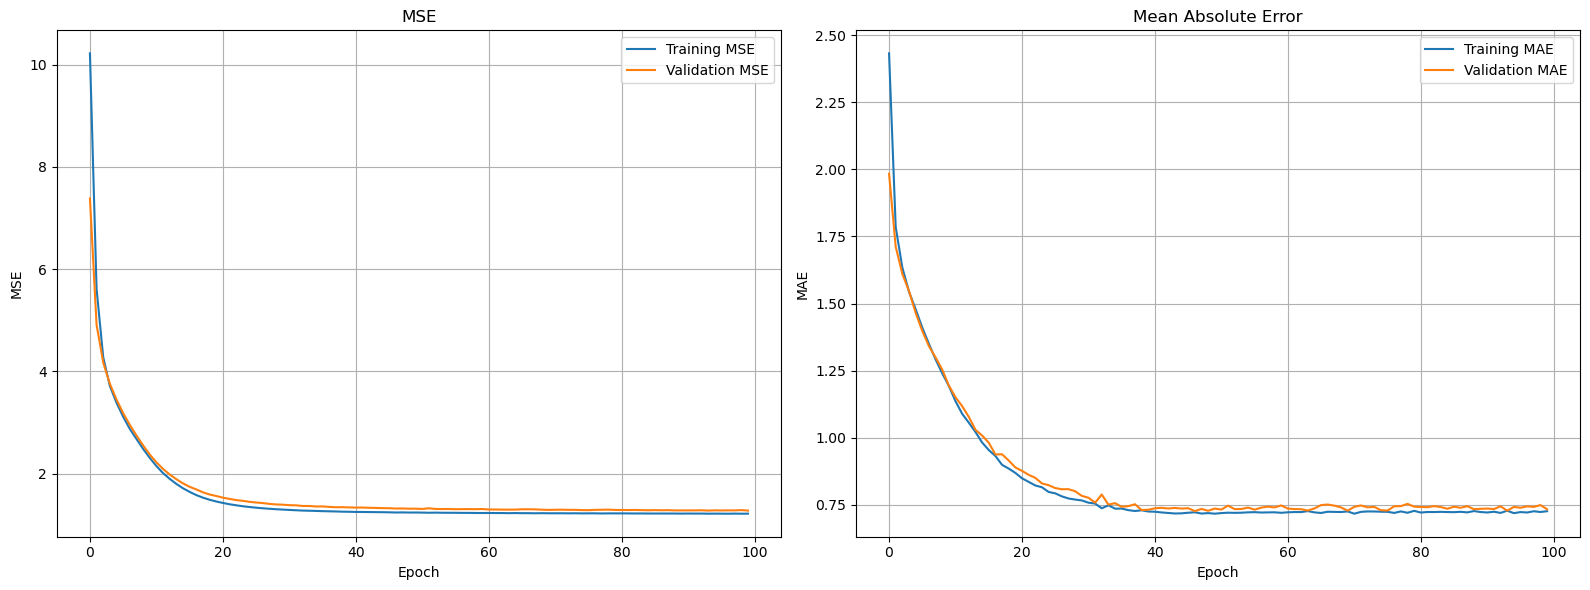


Position:  LB.csv
Epoch 1/100
310/310 [==============================] - 1s 2ms/step - loss: 10.2082 - mean_absolute_error: 2.2966 - val_loss: 6.8830 - val_mean_absolute_error: 1.8993
Epoch 2/100
310/310 [==============================] - 0s 1ms/step - loss: 5.4909 - mean_absolute_error: 1.7196 - val_loss: 4.3965 - val_mean_absolute_error: 1.6562
Epoch 3/100
310/310 [==============================] - 0s 1ms/step - loss: 4.1048 - mean_absolute_error: 1.5739 - val_loss: 3.4952 - val_mean_absolute_error: 1.5141
Epoch 4/100
310/310 [==============================] - 0s 1ms/step - loss: 3.4823 - mean_absolute_error: 1.4670 - val_loss: 3.0433 - val_mean_absolute_error: 1.4113
Epoch 5/100
310/310 [==============================] - 0s 1ms/step - loss: 3.1249 - mean_absolute_error: 1.3846 - val_loss: 2.7362 - val_mean_absolute_error: 1.3430
Epoch 6/100
310/310 [==============================] - 0s 1ms/step - loss: 2.8547 - mean_absolute_error: 1.3276 - val_loss: 2.4916 - val_mean_absolute_erro

KeyboardInterrupt: 

In [27]:
for i in os.listdir('datashotiqr/'):
    print('Position: ', i.split(',')[0])
    training_modelacc('datashotiqr/'+i)
    print('')

Position:  CB.csv
Epoch 1/100
264/264 [==============================] - 1s 1ms/step - loss: 8.6280
Epoch 2/100
264/264 [==============================] - 0s 995us/step - loss: 4.7193
Epoch 3/100
264/264 [==============================] - 0s 1ms/step - loss: 4.0638
Epoch 4/100
264/264 [==============================] - 0s 993us/step - loss: 3.7847
Epoch 5/100
264/264 [==============================] - 0s 1ms/step - loss: 3.5900
Epoch 6/100
264/264 [==============================] - 0s 1ms/step - loss: 3.4276
Epoch 7/100
264/264 [==============================] - 0s 1ms/step - loss: 3.2754
Epoch 8/100
264/264 [==============================] - 0s 944us/step - loss: 3.1326
Epoch 9/100
264/264 [==============================] - 0s 925us/step - loss: 2.9926
Epoch 10/100
264/264 [==============================] - 0s 980us/step - loss: 2.8747
Epoch 11/100
264/264 [==============================] - 0s 949us/step - loss: 2.7537
Epoch 12/100
264/264 [==============================] - 0s 920us/s

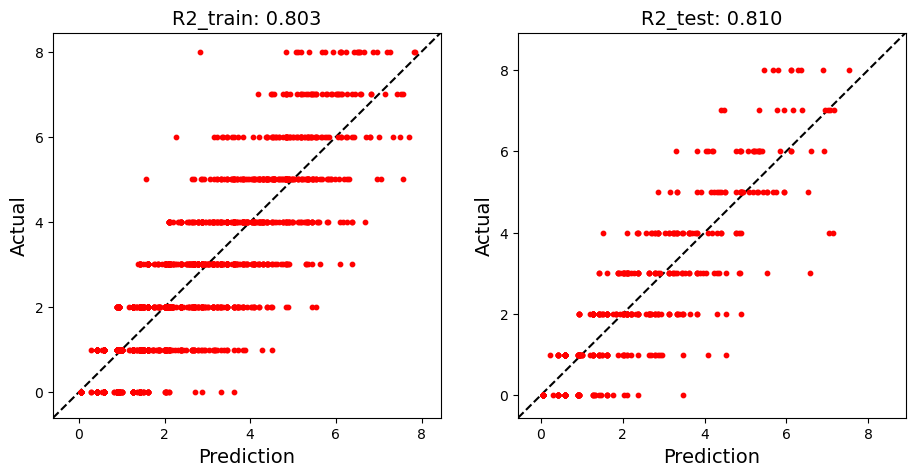


Position:  LB.csv
Epoch 1/100
310/310 [==============================] - 1s 996us/step - loss: 9.1693
Epoch 2/100
310/310 [==============================] - 0s 992us/step - loss: 4.9794
Epoch 3/100
310/310 [==============================] - 0s 1ms/step - loss: 4.2217
Epoch 4/100
310/310 [==============================] - 0s 1ms/step - loss: 3.8850
Epoch 5/100
310/310 [==============================] - 0s 1ms/step - loss: 3.6450
Epoch 6/100
310/310 [==============================] - 0s 1ms/step - loss: 3.4453
Epoch 7/100
310/310 [==============================] - 0s 1ms/step - loss: 3.2621
Epoch 8/100
310/310 [==============================] - 0s 1ms/step - loss: 3.0972
Epoch 9/100
310/310 [==============================] - 0s 989us/step - loss: 2.9426
Epoch 10/100
310/310 [==============================] - 0s 963us/step - loss: 2.8000
Epoch 11/100
310/310 [==============================] - 0s 966us/step - loss: 2.6631
Epoch 12/100
310/310 [==============================] - 0s 971us/st

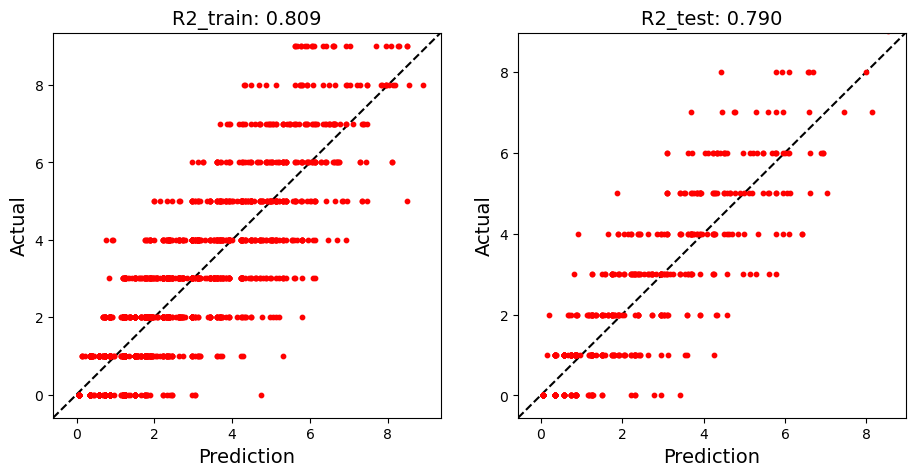


Position:  LW.csv
Epoch 1/100
233/233 [==============================] - 1s 1ms/step - loss: 6.2737
Epoch 2/100
233/233 [==============================] - 0s 1ms/step - loss: 5.3181
Epoch 3/100
233/233 [==============================] - 0s 993us/step - loss: 4.6439
Epoch 4/100
233/233 [==============================] - 0s 1ms/step - loss: 4.1872
Epoch 5/100
233/233 [==============================] - 0s 1ms/step - loss: 3.8828
Epoch 6/100
233/233 [==============================] - 0s 1ms/step - loss: 3.6288
Epoch 7/100
233/233 [==============================] - 0s 974us/step - loss: 3.4151
Epoch 8/100
233/233 [==============================] - 0s 1ms/step - loss: 3.2316
Epoch 9/100
233/233 [==============================] - 0s 1ms/step - loss: 3.0662
Epoch 10/100
233/233 [==============================] - 0s 1ms/step - loss: 2.9064
Epoch 11/100
233/233 [==============================] - 0s 1ms/step - loss: 2.7610
Epoch 12/100
233/233 [==============================] - 0s 1ms/step - los

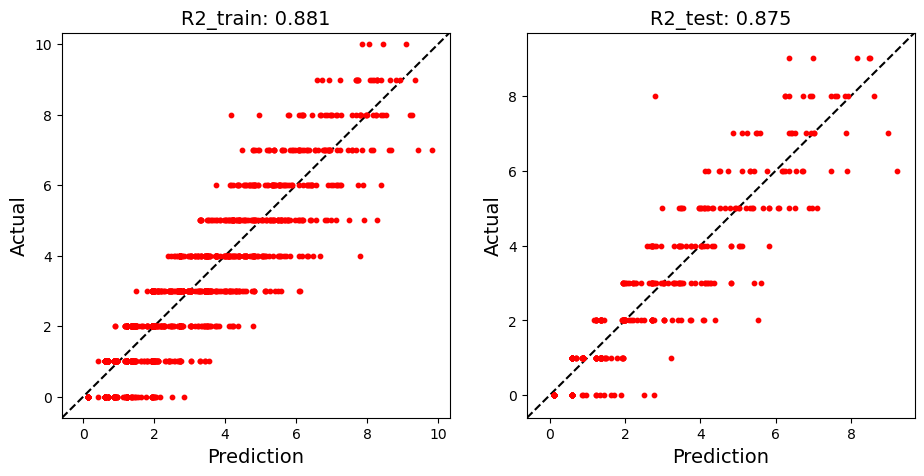


Position:  P.csv
Epoch 1/100
300/300 [==============================] - 1s 984us/step - loss: 2.7726
Epoch 2/100
300/300 [==============================] - 0s 978us/step - loss: 2.2761
Epoch 3/100
300/300 [==============================] - 0s 983us/step - loss: 2.0799
Epoch 4/100
300/300 [==============================] - 0s 1ms/step - loss: 1.9024
Epoch 5/100
300/300 [==============================] - 0s 937us/step - loss: 1.7379
Epoch 6/100
300/300 [==============================] - 0s 981us/step - loss: 1.5848
Epoch 7/100
300/300 [==============================] - 0s 1ms/step - loss: 1.4456
Epoch 8/100
300/300 [==============================] - 0s 985us/step - loss: 1.3180
Epoch 9/100
300/300 [==============================] - 0s 998us/step - loss: 1.2019
Epoch 10/100
300/300 [==============================] - 0s 1ms/step - loss: 1.0982
Epoch 11/100
300/300 [==============================] - 0s 993us/step - loss: 1.0060
Epoch 12/100
300/300 [==============================] - 0s 909

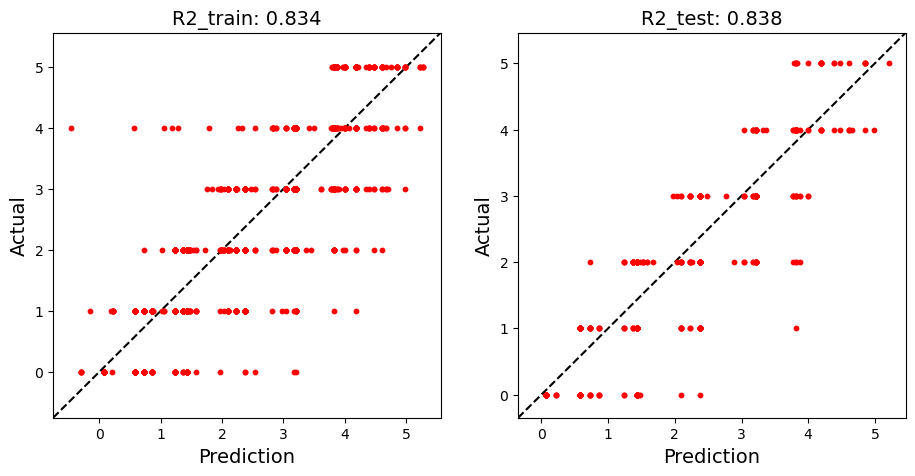


Position:  RB.csv
Epoch 1/100
227/227 [==============================] - 0s 985us/step - loss: 12.0115
Epoch 2/100
227/227 [==============================] - 0s 1ms/step - loss: 7.2418
Epoch 3/100
227/227 [==============================] - 0s 1ms/step - loss: 5.9596
Epoch 4/100
227/227 [==============================] - 0s 895us/step - loss: 5.5989
Epoch 5/100
227/227 [==============================] - 0s 926us/step - loss: 5.3841
Epoch 6/100
227/227 [==============================] - 0s 966us/step - loss: 5.1903
Epoch 7/100
227/227 [==============================] - 0s 936us/step - loss: 5.0349
Epoch 8/100
227/227 [==============================] - 0s 938us/step - loss: 4.8818
Epoch 9/100
227/227 [==============================] - 0s 949us/step - loss: 4.7358
Epoch 10/100
227/227 [==============================] - 0s 919us/step - loss: 4.5938
Epoch 11/100
227/227 [==============================] - 0s 969us/step - loss: 4.4512
Epoch 12/100
227/227 [==============================] - 0s

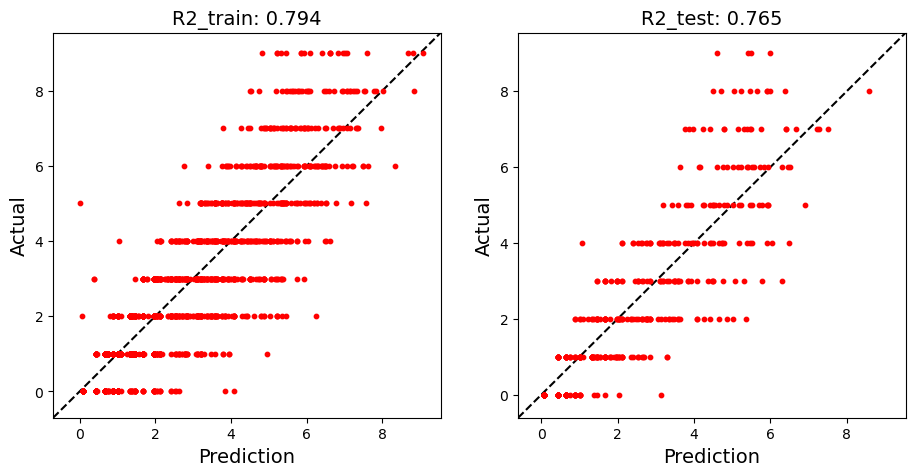


Position:  RW.csv
Epoch 1/100
233/233 [==============================] - 1s 1ms/step - loss: 7.8771
Epoch 2/100
233/233 [==============================] - 0s 941us/step - loss: 5.2942
Epoch 3/100
233/233 [==============================] - 0s 963us/step - loss: 4.5530
Epoch 4/100
233/233 [==============================] - 0s 967us/step - loss: 4.1760
Epoch 5/100
233/233 [==============================] - 0s 966us/step - loss: 3.9159
Epoch 6/100
233/233 [==============================] - 0s 938us/step - loss: 3.7141
Epoch 7/100
233/233 [==============================] - 0s 940us/step - loss: 3.5455
Epoch 8/100
233/233 [==============================] - 0s 976us/step - loss: 3.3892
Epoch 9/100
233/233 [==============================] - 0s 958us/step - loss: 3.2369
Epoch 10/100
233/233 [==============================] - 0s 949us/step - loss: 3.0911
Epoch 11/100
233/233 [==============================] - 0s 944us/step - loss: 2.9521
Epoch 12/100
233/233 [==============================] - 0

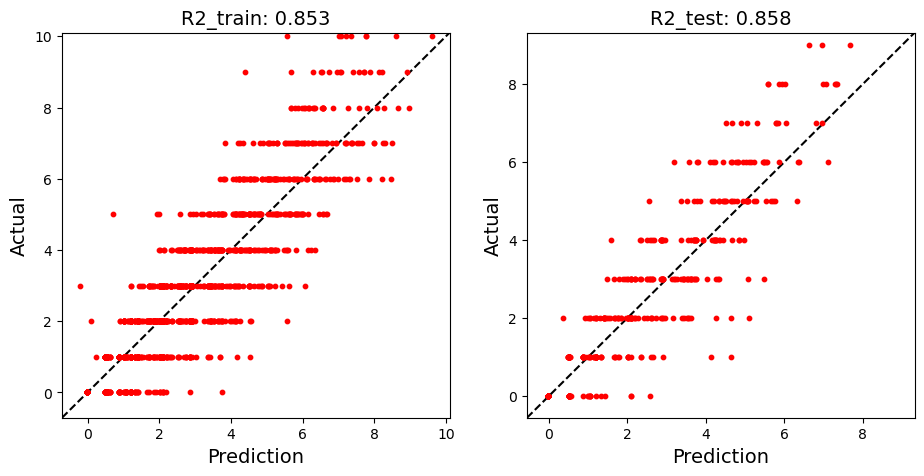

In [10]:
for i in os.listdir('datashotiqr/'):
    print('Position: ', i.split(',')[0])
    training_modelshot('datashotiqr/'+i)
    print('')